In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from google.colab import drive

In [4]:
# Mount Google Drive ke Colab
drive.mount('/content/drive')

# Path file Excel di Google Drive
file_path = '/content/drive/My Drive/Afl.xlsx'
# Membaca file Excel
data = pd.read_excel(file_path)
# Menampilkan data awal dan informasi kolom
display(data.head())
print(data.info())

Mounted at /content/drive


,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,HomeTeamScoreHT,HomeTeamScore3QT,HomeTeamScoreFT,HomeTeamScore,AwayTeam,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore
0,2012R0101,2012,R1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,38.203,...,3.3,3.4,5.70,37,Sydney,4.1,8.4,13.80,14.16,100
1,2012R0102,2012,R1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,78.285,...,5.6,10.7,12.90,81,Carlton,3.2,8.7,11.13,18.17,125
2,2012R0103,2012,R1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,78.466,...,10.6,14.1,20.17,137,Collingwood,2.7,7.9,12.16,16.19,115
3,2012R0104,2012,R1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,33.473,...,7.4,8.8,11.12,78,Brisbane Lions,1.4,7.8,13.13,17.17,119
4,2012R0105,2012,R1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,12.790,...,5.3,8.6,10.80,68,Adelaide,7.8,11.1,15.16,19.23,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GameId            2447 non-null   object 
 1   Year              2447 non-null   int64  
 2   Round             2447 non-null   object 
 3   Date              2447 non-null   object 
 4   MaxTemp           2440 non-null   float64
 5   MinTemp           2440 non-null   float64
 6   Rainfall          2425 non-null   float64
 7   Venue             2447 non-null   object 
 8   StartTime         2447 non-null   object 
 9   Attendance        2447 non-null   float64
 10  HomeTeam          2447 non-null   object 
 11  HomeTeamScoreQT   2447 non-null   float64
 12  HomeTeamScoreHT   2447 non-null   float64
 13  HomeTeamScore3QT  2447 non-null   float64
 14  HomeTeamScoreFT   2447 non-null   float64
 15  HomeTeamScore     2447 non-null   int64  
 16  AwayTeam          2447 non-null   object 


In [5]:
# Memeriksa Missing Value
print("\nMemeriksa missing value:\n")
missing_values = data.isnull().sum()
print(missing_values)

# Mengecek total missing values di seluruh dataset
total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing}")



Memeriksa missing value:

GameId               0
Year                 0
Round                0
Date                 0
MaxTemp              7
MinTemp              7
Rainfall            22
Venue                0
StartTime            0
Attendance           0
HomeTeam             0
HomeTeamScoreQT      0
HomeTeamScoreHT      0
HomeTeamScore3QT     0
HomeTeamScoreFT      0
HomeTeamScore        0
AwayTeam             0
AwayTeamScoreQT      0
AwayTeamScoreHT      0
AwayTeamScore3QT     0
AwayTeamScoreFT      0
AwayTeamScore        0
dtype: int64

Total missing values: 36


In [6]:
# Mengecek distribusi data untuk MaxTemp, MinTemp, dan Rainfall
print("\nDistribusi MaxTemp:\n")
print(data['MaxTemp'].describe())

print("\nDistribusi MinTemp:\n")
print(data['MinTemp'].describe())

print("\nDistribusi Rainfall:\n")
print(data['Rainfall'].describe())


Distribusi MaxTemp:

count    2440.000000
mean       19.139385
std         5.009624
min         8.700000
25%        15.100000
50%        18.500000
75%        22.700000
max        37.600000
Name: MaxTemp, dtype: float64

Distribusi MinTemp:

count    2440.000000
mean        9.783443
std         4.525184
min        -5.400000
25%         6.800000
50%         9.400000
75%        12.700000
max        25.000000
Name: MinTemp, dtype: float64

Distribusi Rainfall:

count    2425.000000
mean        2.222144
std         6.549087
min         0.000000
25%         0.000000
50%         0.000000
75%         1.600000
max       114.400000
Name: Rainfall, dtype: float64


In [7]:
# Mengisi missing value dengan mean untuk MaxTemp dan MinTemp
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)

# Mengisi missing value dengan median untuk Rainfall karena distribusinya skewed
data['Rainfall'].fillna(data['Rainfall'].median(), inplace=True)

# Mengecek kembali apakah missing value sudah teratasi
print("\nMissing value setelah imputasi:\n")
print(data.isnull().sum())



Missing value setelah imputasi:

GameId              0
Year                0
Round               0
Date                0
MaxTemp             0
MinTemp             0
Rainfall            0
Venue               0
StartTime           0
Attendance          0
HomeTeam            0
HomeTeamScoreQT     0
HomeTeamScoreHT     0
HomeTeamScore3QT    0
HomeTeamScoreFT     0
HomeTeamScore       0
AwayTeam            0
AwayTeamScoreQT     0
AwayTeamScoreHT     0
AwayTeamScore3QT    0
AwayTeamScoreFT     0
AwayTeamScore       0
dtype: int64


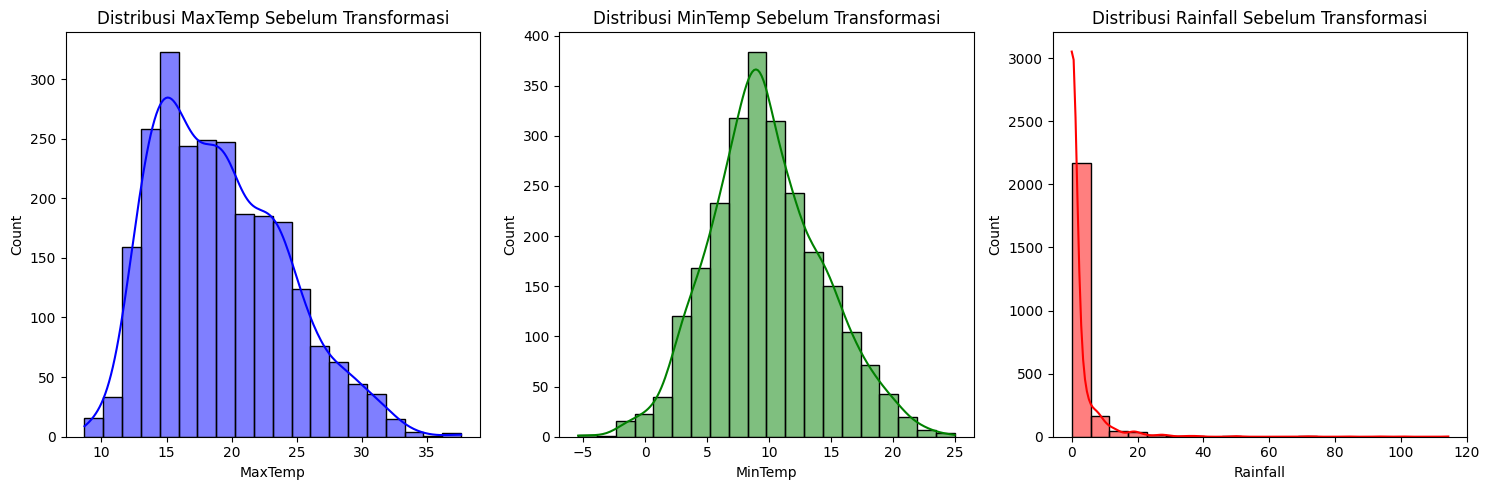

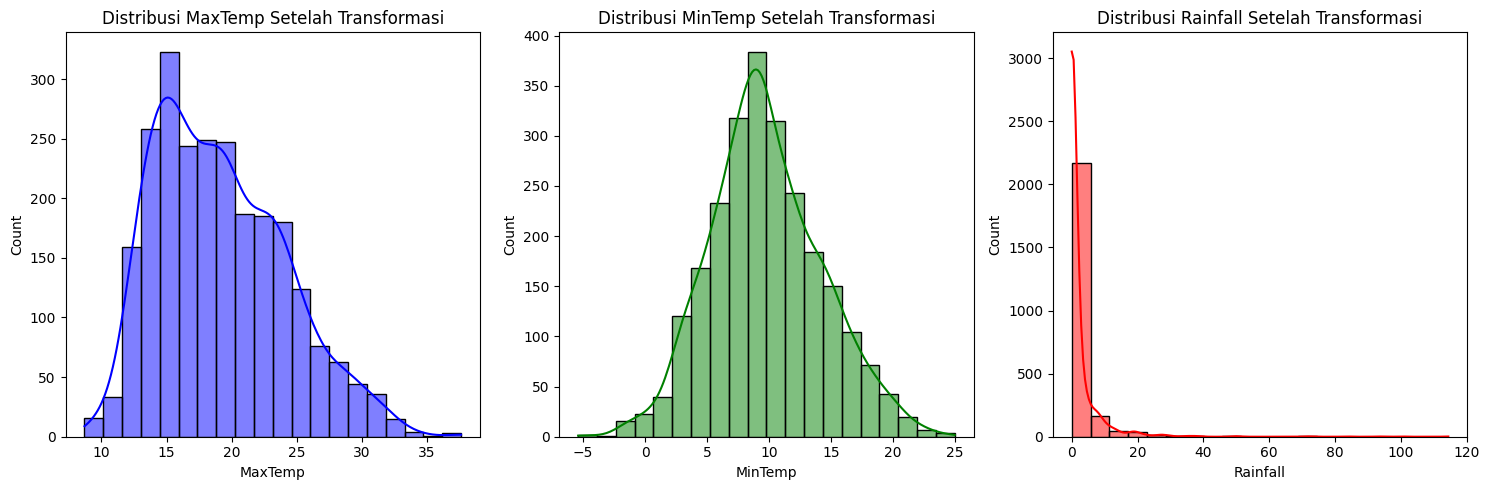

In [25]:
# 1. Visualisasi Sebelum Transformasi
plt.figure(figsize=(15, 5))

# MaxTemp
plt.subplot(1, 3, 1)
sns.histplot(data['MaxTemp'], kde=True, bins=20, color='blue')
plt.title("Distribusi MaxTemp Sebelum Transformasi")

# MinTemp
plt.subplot(1, 3, 2)
sns.histplot(data['MinTemp'], kde=True, bins=20, color='green')
plt.title("Distribusi MinTemp Sebelum Transformasi")

# Rainfall
plt.subplot(1, 3, 3)
sns.histplot(data['Rainfall'], kde=True, bins=20, color='red')
plt.title("Distribusi Rainfall Sebelum Transformasi")

plt.tight_layout()
plt.show()

# 2. Transformasi Data (Imputasi Missing Values)
# Mengisi missing value dengan mean untuk MaxTemp dan MinTemp
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)

# Mengisi missing value dengan median untuk Rainfall
data['Rainfall'].fillna(data['Rainfall'].median(), inplace=True)

# 3. Visualisasi Sesudah Transformasi
plt.figure(figsize=(15, 5))

# MaxTemp
plt.subplot(1, 3, 1)
sns.histplot(data['MaxTemp'], kde=True, bins=20, color='blue')
plt.title("Distribusi MaxTemp Setelah Transformasi")

# MinTemp
plt.subplot(1, 3, 2)
sns.histplot(data['MinTemp'], kde=True, bins=20, color='green')
plt.title("Distribusi MinTemp Setelah Transformasi")

# Rainfall
plt.subplot(1, 3, 3)
sns.histplot(data['Rainfall'], kde=True, bins=20, color='red')
plt.title("Distribusi Rainfall Setelah Transformasi")

plt.tight_layout()
plt.show()


In [26]:
# Mengidentifikasi kolom numerik
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Kolom numerik:", numerical_columns)

# Mencari outlier menggunakan metode IQR
def find_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Mencari data yang di luar bound (outliers)
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f'Outlier pada kolom {col}:')
        if not outliers[col].empty:
            print(outliers[col][[col]].head())
        else:
            print(f'Tidak ada outlier di kolom {col}')
    return outliers

# Mencari outlier dalam data
outliers = find_outliers_iqr(data, numerical_columns)

# Mengecek jika ada outlier di seluruh kolom numerik
if any([len(outliers[col]) > 0 for col in numerical_columns]):
    print("Outlier ditemukan.")
else:
    print("Tidak ada outlier.")

Kolom numerik: Index(['Year', 'MaxTemp', 'MinTemp', 'Rainfall', 'Attendance',
       'HomeTeamScoreQT', 'HomeTeamScoreHT', 'HomeTeamScore3QT',
       'HomeTeamScoreFT', 'HomeTeamScore', 'AwayTeamScoreQT',
       'AwayTeamScoreHT', 'AwayTeamScore3QT', 'AwayTeamScoreFT',
       'AwayTeamScore'],
      dtype='object')
Outlier pada kolom Year:
Tidak ada outlier di kolom Year
Outlier pada kolom MaxTemp:
      MaxTemp
422      33.9
1041     33.9
1453     34.3
1825     37.6
2125     33.9
Outlier pada kolom MinTemp:
     MinTemp
129     22.6
292     23.7
429     22.7
446     21.6
577     -4.5
Outlier pada kolom Rainfall:
    Rainfall
22       9.2
33       7.2
36      19.0
41      38.4
53      10.4
Outlier pada kolom Attendance:
    Attendance
1       78.285
2       78.466
18      84.259
36      86.932
68      80.900
Outlier pada kolom HomeTeamScoreQT:
     HomeTeamScoreQT
46               8.3
88               9.0
111              8.3
234              8.1
295              9.7
Outlier pada kolom

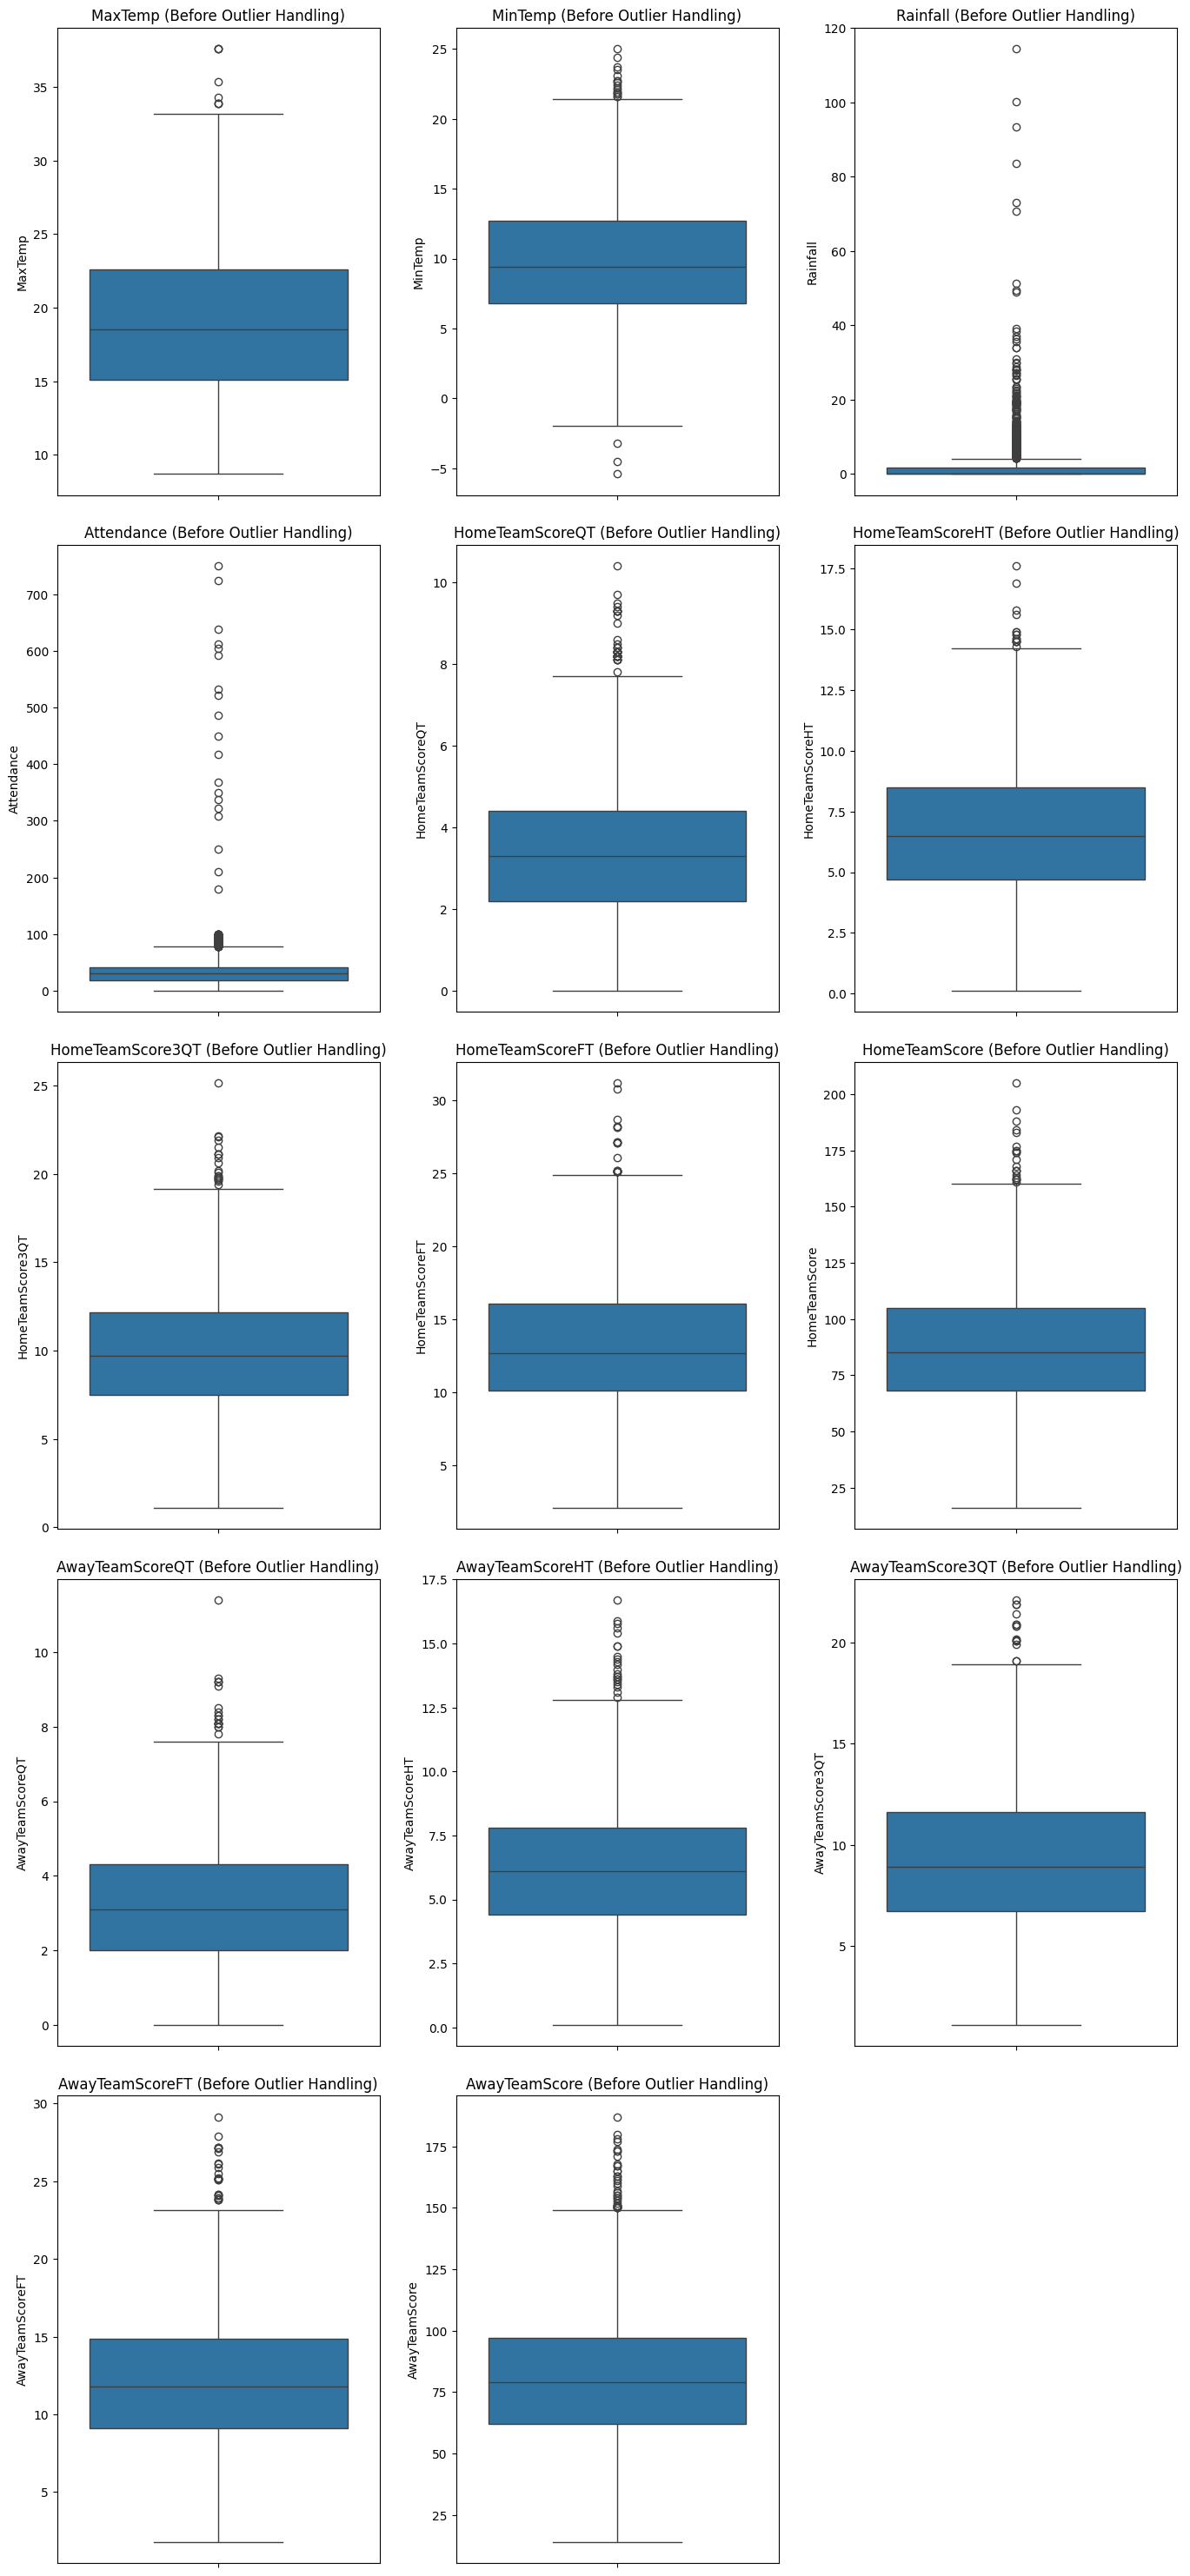

In [27]:
# Mengidentifikasi kolom numerik yang memiliki outlier
outlier_columns = [col for col in numerical_columns if len(outliers[col]) > 0]

# Menentukan jumlah kolom dan baris untuk boxplot
num_cols = 3
num_rows = (len(outlier_columns) + num_cols - 1) // num_cols  # Menghitung jumlah baris

# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(14, 6 * num_rows))

# Membuat boxplot untuk setiap kolom yang memiliki outlier
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=data[col], )
    plt.title(f'{col} (Before Outlier Handling)', fontsize=12)
    plt.xlabel('')  # Menghapus label X karena tidak dibutuhkan
    plt.ylabel(col, fontsize=10)  # Label Y untuk nama kolom

# Menyusun layout dan memberikan padding
plt.tight_layout(pad=2.0)
plt.show()


In [11]:
# Fungsi untuk mendeteksi dan mengimputasi outlier menggunakan metode IQR
def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung nilai median untuk kolom tersebut
    median_value = df[column].median()

    # Mengimputasi nilai outlier dengan median
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

# Kolom-kolom yang akan diimputasi
columns_to_impute = [
    'MaxTemp', 'MinTemp', 'Rainfall',  'Attendance',
    'HomeTeamScoreQT', 'HomeTeamScoreHT', 'HomeTeamScore3QT', 'HomeTeamScoreFT', 'HomeTeamScore',
    'AwayTeamScoreQT', 'AwayTeamScoreHT', 'AwayTeamScore3QT', 'AwayTeamScoreFT', 'AwayTeamScore'
]

# Menyalin dataframe asli untuk menjaga data asli tetap utuh
data_imputed = data.copy()

# Mengimputasi outlier untuk setiap kolom dalam daftar
for column in columns_to_impute:
    data_imputed = impute_outliers_iqr(data_imputed, column)

# Menampilkan data yang sudah diimputasi
print(data_imputed.head())



      GameId  Year Round        Date  MaxTemp  MinTemp  Rainfall  \
0  2012R0101  2012    R1  2012-03-24     24.0     12.2       0.0   
1  2012R0102  2012    R1  2012-03-29     25.7      9.7       0.0   
2  2012R0103  2012    R1  2012-03-30     27.4      9.7       0.0   
3  2012R0104  2012    R1  2012-03-31     29.1     15.1       0.6   
4  2012R0105  2012    R1  2012-03-31     28.2     19.7       0.0   

               Venue StartTime  Attendance  ... HomeTeamScoreHT  \
0  Stadium Australia   7:20 PM      38.203  ...             3.3   
1             M.C.G.   7:45 PM      30.422  ...             5.6   
2             M.C.G.   7:50 PM      30.422  ...            10.6   
3             M.C.G.   1:45 PM      33.473  ...             7.4   
4            Carrara   3:45 PM      12.790  ...             5.3   

   HomeTeamScore3QT  HomeTeamScoreFT  HomeTeamScore        AwayTeam  \
0               3.4             5.70           37.0          Sydney   
1              10.7            12.90          

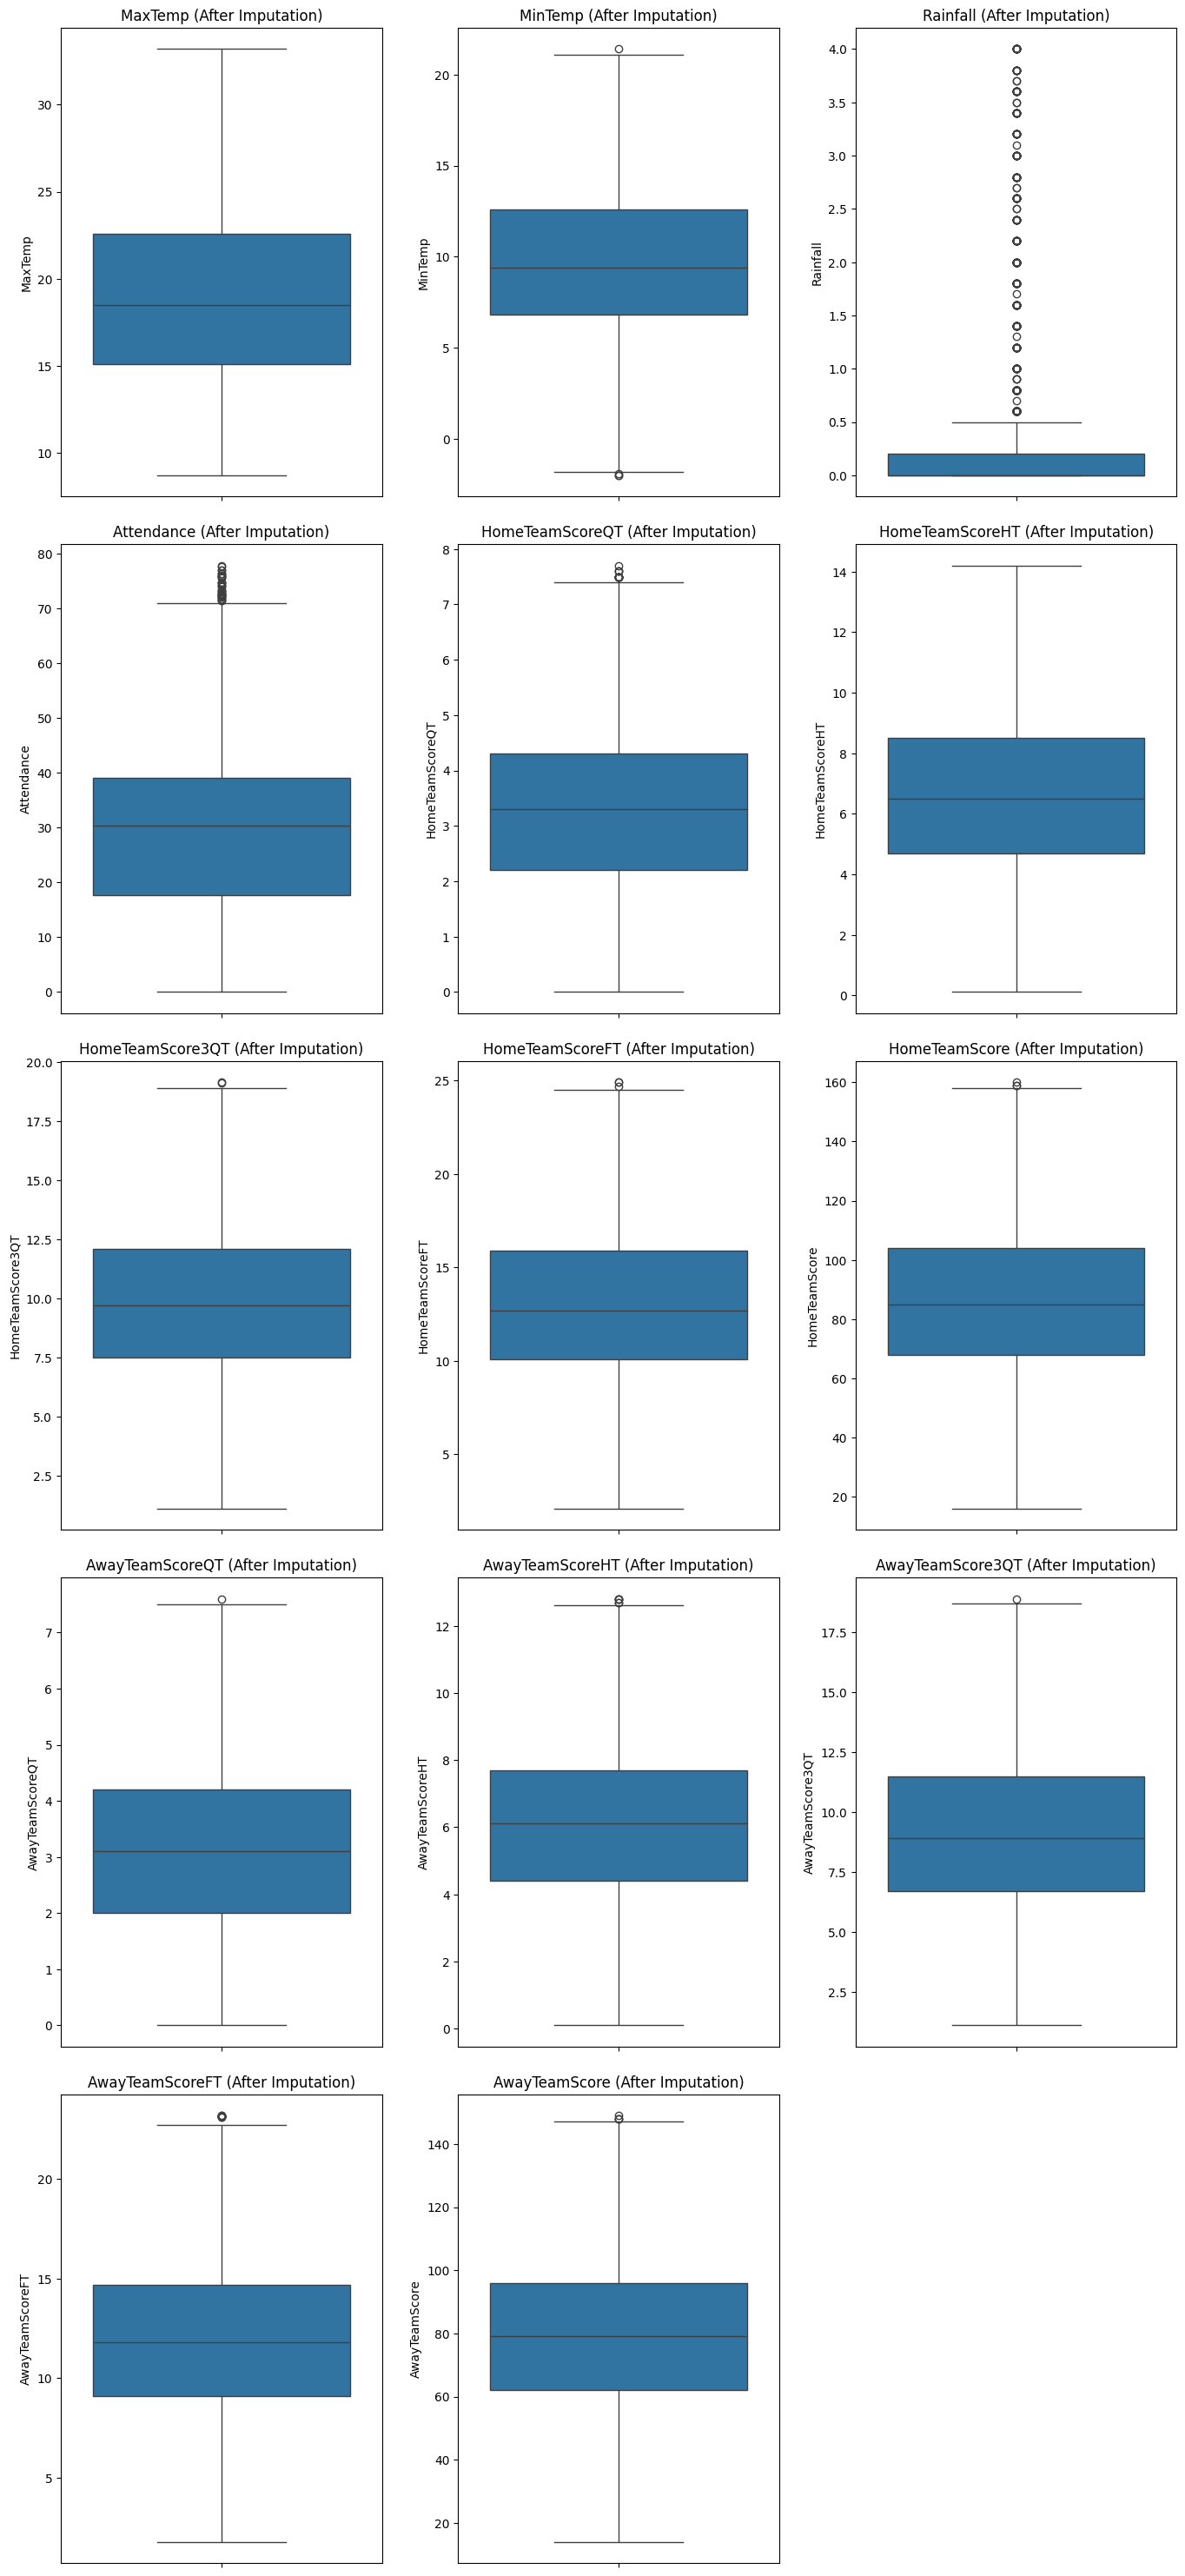

In [28]:
# Menentukan jumlah kolom dan baris untuk boxplot
num_cols = 3
num_rows = (len(columns_to_impute) + num_cols - 1) // num_cols  # Menghitung jumlah baris

plt.figure(figsize=(14, 6 * num_rows))  # Memperbesar figsize agar plot lebih lebar dan tinggi

# Membuat box plot untuk kolom yang telah diimputasi
for i, col in enumerate(columns_to_impute, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=data_imputed[col])
    plt.title(f'{col} (After Imputation)', fontsize=12)  # Judul plot

plt.tight_layout(pad=2.0)  # Menambah padding antar subplot
plt.show()


In [15]:
import numpy as np

# Menyalin dataframe asli untuk menjaga data asli tetap utuh
data_log_transformed = data.copy()

# Melakukan log transformasi pada kolom-kolom yang sesuai
columns_to_transform = [
    'MaxTemp', 'MinTemp', 'Rainfall', 'Attendance',
    'HomeTeamScoreQT', 'HomeTeamScoreHT', 'HomeTeamScore3QT', 'HomeTeamScoreFT', 'HomeTeamScore',
    'AwayTeamScoreQT', 'AwayTeamScoreHT', 'AwayTeamScore3QT', 'AwayTeamScoreFT', 'AwayTeamScore'
]

# Melakukan log transformasi
for column in columns_to_transform:
    # Menambahkan 1 untuk menghindari log(0) yang tidak terdefinisi
    data_log_transformed[column] = np.log1p(data_log_transformed[column])

# Menampilkan data yang sudah ditransformasi
print(data_log_transformed.head())


      GameId  Year Round        Date   MaxTemp   MinTemp  Rainfall  \
0  2012R0101  2012    R1  2012-03-24  3.218876  2.580217  0.000000   
1  2012R0102  2012    R1  2012-03-29  3.284664  2.370244  0.000000   
2  2012R0103  2012    R1  2012-03-30  3.346389  2.370244  0.000000   
3  2012R0104  2012    R1  2012-03-31  3.404525  2.778819  0.470004   
4  2012R0105  2012    R1  2012-03-31  3.374169  3.030134  0.000000   

               Venue StartTime  Attendance  ... HomeTeamScoreHT  \
0  Stadium Australia   7:20 PM    3.668753  ...        1.458615   
1             M.C.G.   7:45 PM    4.373049  ...        1.887070   
2             M.C.G.   7:50 PM    4.375329  ...        2.451005   
3             M.C.G.   1:45 PM    3.540176  ...        2.128232   
4            Carrara   3:45 PM    2.623944  ...        1.840550   

   HomeTeamScore3QT  HomeTeamScoreFT  HomeTeamScore        AwayTeam  \
0          1.481605         1.902108       3.637586          Sydney   
1          2.459589         2.6318

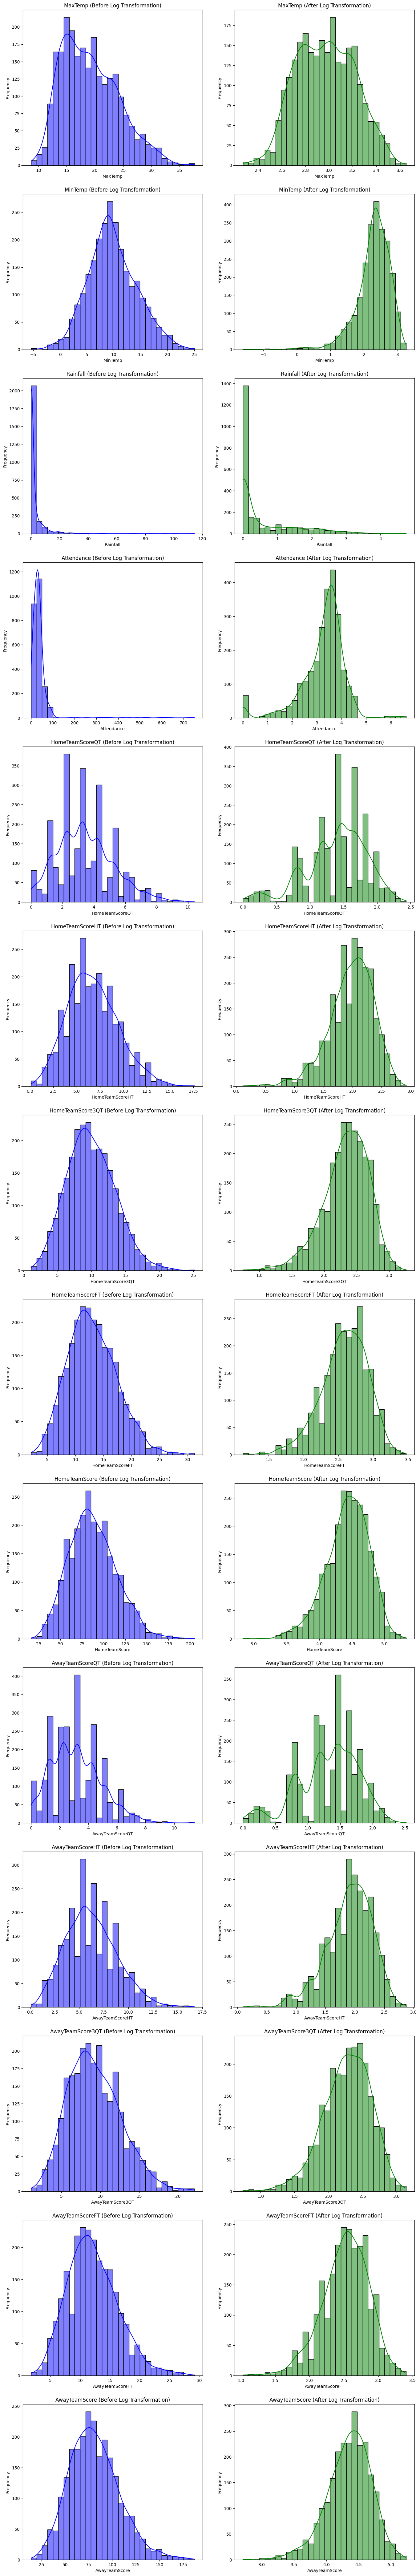

In [29]:
# Menentukan jumlah kolom (2: sebelum dan sesudah transformasi)
num_cols = 2
num_rows = len(log_transform_columns)  # Setiap kolom akan ditampilkan dalam satu baris

# Menentukan ukuran figure untuk visualisasi
plt.figure(figsize=(14, 6 * num_rows))

# Looping untuk setiap kolom yang akan ditransformasi
for i, col in enumerate(log_transform_columns):
    # Plot histogram sebelum log transformasi
    plt.subplot(num_rows, num_cols, 2 * i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='blue')  # Histogram sebelum transformasi
    plt.title(f'{col} (Before Log Transformation)', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot histogram setelah log transformasi
    plt.subplot(num_rows, num_cols, 2 * i + 2)
    sns.histplot(data_log_transformed[col], kde=True, bins=30, color='green')  # Histogram setelah transformasi
    plt.title(f'{col} (After Log Transformation)', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout(pad=2.0)
plt.show()
